# EDA Detección de Fraudes Financieros.

Carga el Dataset desde Drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data1 = '/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv'

In [4]:
!ls /content/drive/MyDrive/PS_20174392719_1491204439457_log.csv

/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv


Carga librerias.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Carga los datos.

In [6]:
test_data1 = pd.read_csv(data1)
test_data1.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [49]:
test_data1['type'] = test_data1['type'].replace({
    'TRANSFER': 'TRANSFERENCIA',
    'CASH_OUT': 'RETIRO',
    'CASH_IN': 'DEPOSITO',
    'DEBIT': 'DEBITO',
    'PAYMENT': 'PAGO',
})



Verifica la Cantidad de filas existentes.


In [7]:
test_data1.shape

(6362620, 11)

Verifica los valores nulos.

In [8]:
test_data1.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Comprobar descripción del dataframe, tipos de datos y valores faltantes.

In [9]:
test_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


El DataFrame tiene 6.362.620 entradas con 11 columnas, 5 de tipo float64, 3 de tipo int64 y 3 de tipo object, lo que requiere más de 534 MB de memoria.

In [10]:
test_data1.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Acá proporciona un resumen de métricas estadísticas para las columnas numéricas del DataFrame, esto ayuda a obtener una descripción general rápida de la distribución y las características del mismo.

type
RETIRO           2237500
PAGO             2151495
DEPOSITO         1399284
TRANSFERENCIA     532909
DEBITO             41432
Name: count, dtype: int64


Text(0.5, 1.0, 'Gráfico 1: Distribución del tipo de transacción')

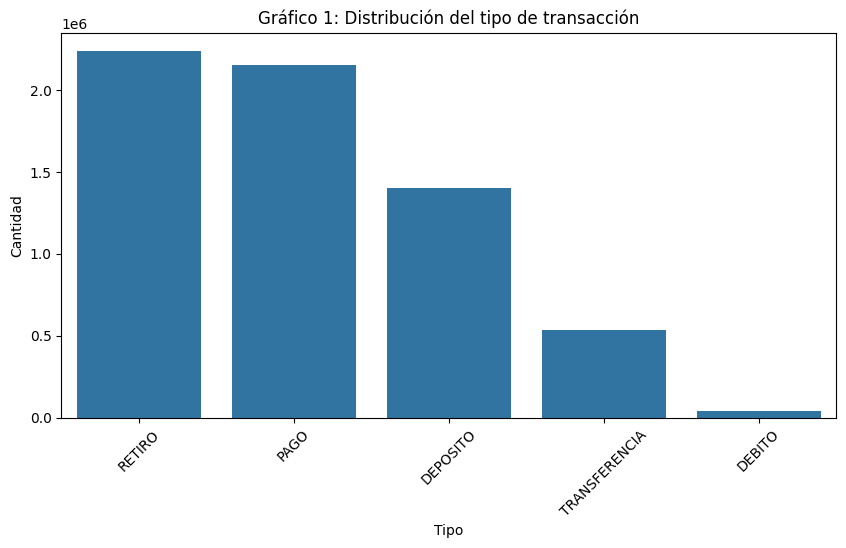

In [41]:
print(test_data1['type'].value_counts())

plt.rcParams['figure.figsize']=[10,5]
sns.countplot(x='type', data=test_data1, order=test_data1['type'].value_counts().index)
plt.xticks(rotation= 45)
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.title('Gráfico 1: Distribución del tipo de transacción')


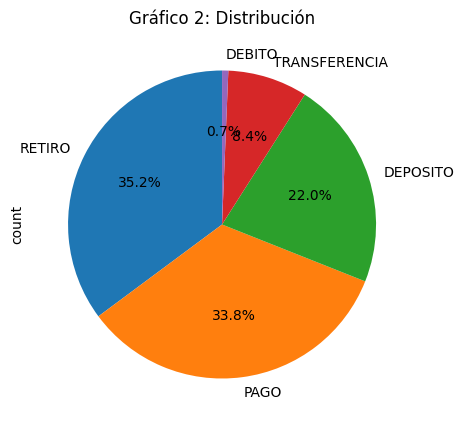

In [42]:

test_data1['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Gráfico 2: Distribución')
plt.show()

En el gráfico 1 tenemos la frecuencia de cada tipo de transacción. donde encontramos que RETIRO y PAGO son los más comunes, con alrededor de 2 millones de casos cada uno. Siendo El DEPOSITO menos frecuente, seguido de  TRANSFERENCIA. DEBITO es el menos común y muestra una actividad mínima.

En el gráfico 2 tenemos  la distribución porcentual de los tipos de transacciones. Podemos observar que RETIRO tiene la proporción más alta con un 35,2%, seguido de cerca por el PAGO con un 33,8%. DEPOSITO representa el 22,0%, TRANSFERENCIA es el 8,4%. Siendo así DEBITO la porción más pequeña y comprende solo el 0,7% de las transacciones.



In [13]:
test_data1['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [14]:
test_data1['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64


*   isFraud: indica las transacciones fraudulentas reales
*   isFlaggedFraud: el sistema impide la transacción cuando se intenta transferir más de 200.000 en una sola transacción





In [15]:
percent= (8213/6362620)*100
percent

0.12908204481801522

Los datos muestran que de 6.362.620 transacciones 8.213 son fraudulentas. Esto da como resultado un porcentaje de fraude de aproximado de 0,13 %, lo que indica una baja incidencia de actividad fraudulenta en el dataframe.

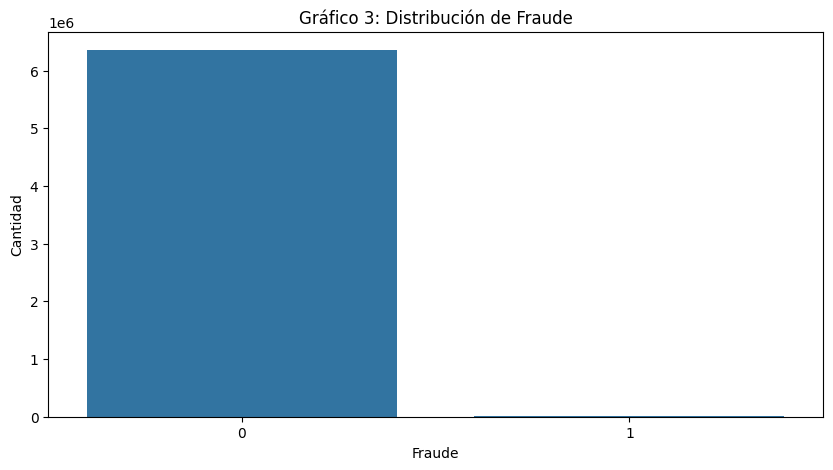

In [48]:
sns.countplot(x='isFraud', data=test_data1)
plt.rcParams['figure.figsize']=[10,5]
plt.xlabel('Fraude')
plt.ylabel('Cantidad')
plt.title('Gráfico 3: Distribución de Fraude')
plt.show()

El gráfico de recuento de la visualización muestra la distribución del fraude (donde isFraud es 1) frente a las transacciones no fraudulentas (donde isFraud es 0).

In [17]:
test_data1[(test_data1['isFraud'] == 1)]['type'].value_counts()

type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

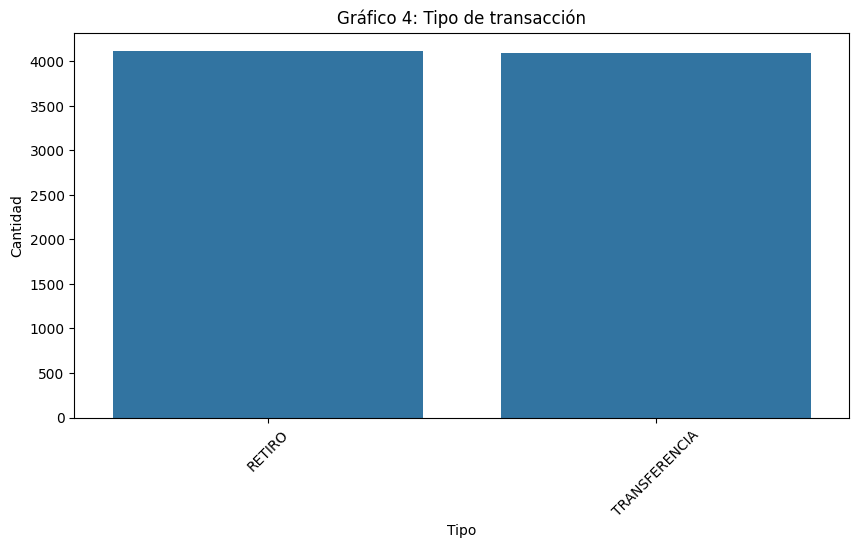

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(x='type', data=test_data1[(test_data1['isFraud'] == 1)], order=test_data1[(test_data1['isFraud'] == 1)]['type'].value_counts().index)
plt.xticks(rotation= 45)
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.title('Gráfico 4: Tipo de transacción')
plt.show()

Acá podemos observar que las transacciones fraudulentas sólo se presentan cuando es de tipo TRANSFER y CASH_OUT.

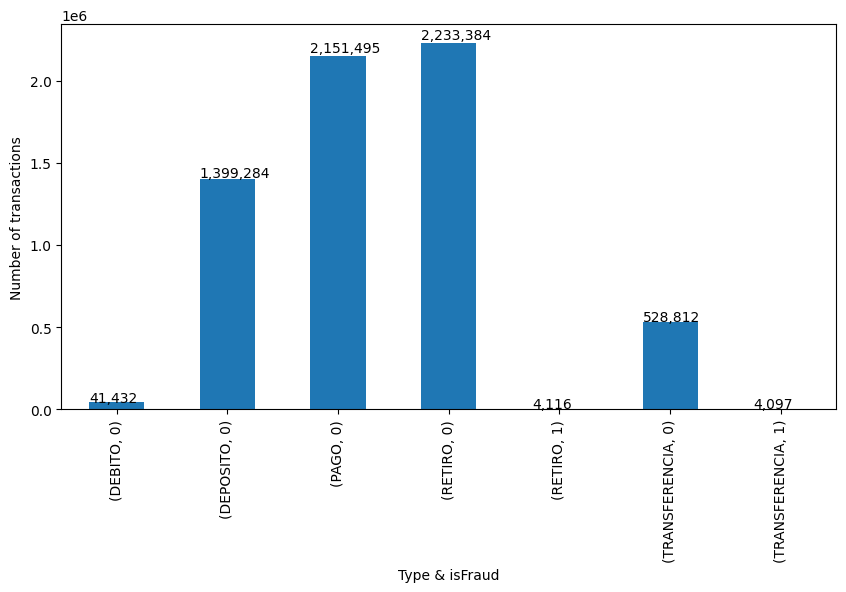

In [46]:
ax=test_data1.groupby(['type','isFraud']).size().plot(kind='bar')
ax.set_title('')
ax.set_xlabel("Type & isFraud")
ax.set_ylabel("Number of transactions")
for t in ax.patches:
    ax.annotate(str(format(int(t.get_height()),',d')),(t.get_x(),t.get_height()*1.01))

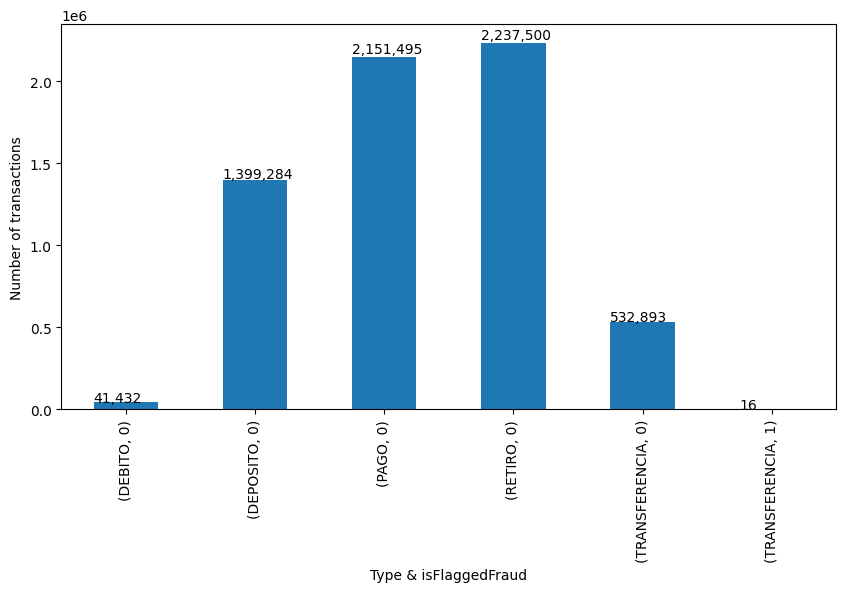

In [45]:
ax=test_data1.groupby(['type','isFlaggedFraud']).size().plot(kind='bar')
ax.set_title('')
ax.set_xlabel("Type & isFlaggedFraud")
ax.set_ylabel("Number of transactions")
for t in ax.patches:
    ax.annotate(str(format(int(t.get_height()),',d')),(t.get_x(),t.get_height()*1.01))

Acá comprobamos los tipos de transacciones que se están falsificando y que son fraude.

In [44]:
test_data1['hourOfDay']=test_data1['step']%24

In [43]:
fraud_data1=test_data1[test_data1['isFraud']==1]
fraud_data1.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hourOfDay
2,1,TRANSFERENCIA,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0,1
3,1,RETIRO,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0,1
251,1,TRANSFERENCIA,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0,1
252,1,RETIRO,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0,1
680,1,TRANSFERENCIA,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0,1


creamos una columna con un tiempo de 24 horas y verificamos

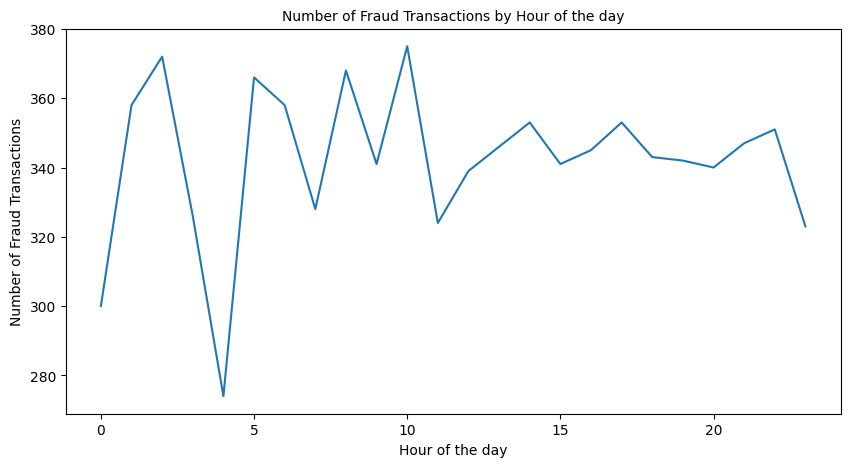

In [30]:
hour_fraud=fraud_data1.groupby('hourOfDay').size()
plt.plot(hour_fraud.index,hour_fraud.values)
plt.title('Number of Fraud Transactions by Hour of the day',fontsize=10)
plt.xlabel('Hour of the day')
plt.ylabel('Number of Fraud Transactions')
plt.show()

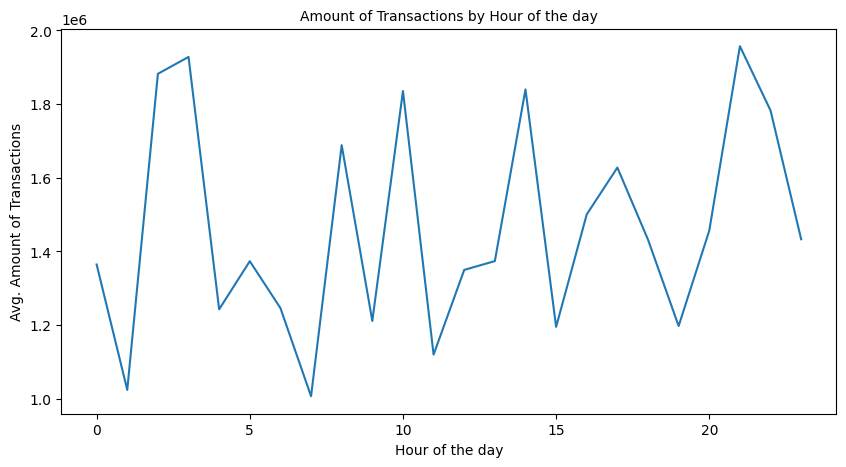

In [31]:
hour_transaction=fraud_data1.groupby('hourOfDay')['amount'].mean()
plt.plot(hour_transaction.index,hour_transaction.values)
plt.title('Amount of Transactions by Hour of the day',fontsize=10)
plt.xlabel('Hour of the day')
plt.ylabel('Avg. Amount of Transactions')
plt.show()

En los Anteriores gráficos visibiliza la trama que muestra el fraude en la hora del día y comprobamos el monto de la transacción que se realizó en diferentes marcas de tiempo.

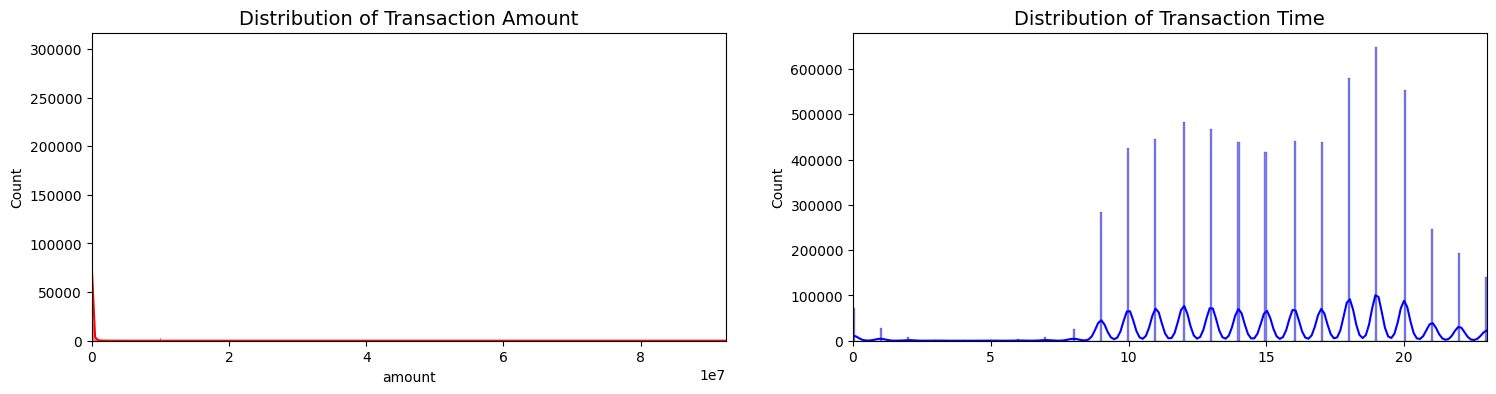

In [37]:

fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = test_data1['amount']
time_val = test_data1['hourOfDay'].values

# Gráfico de distribución del monto de las transacciones
sns.histplot(amount_val, ax=ax[0], color='r', kde=True)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

# Gráfico de distribución de la hora del día de las transacciones
sns.histplot(time_val, ax=ax[1], color='b', kde=True)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

Comprobamos la distribución del monto de la transacción y el tiempo de la transacción.

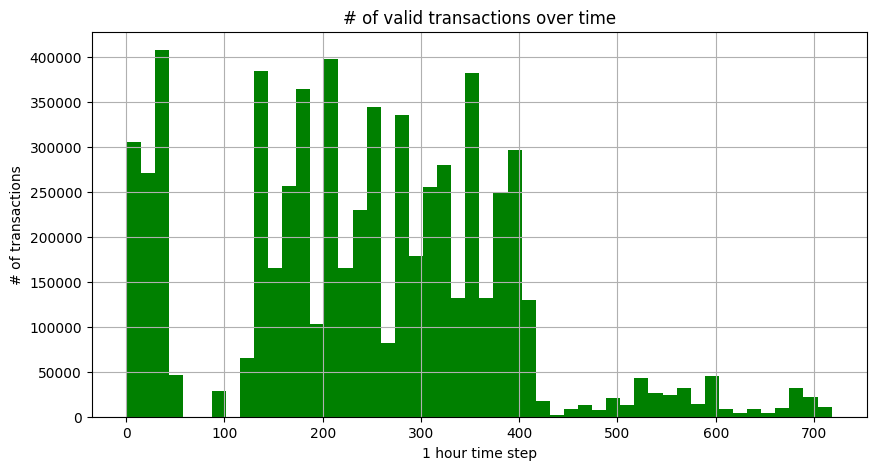

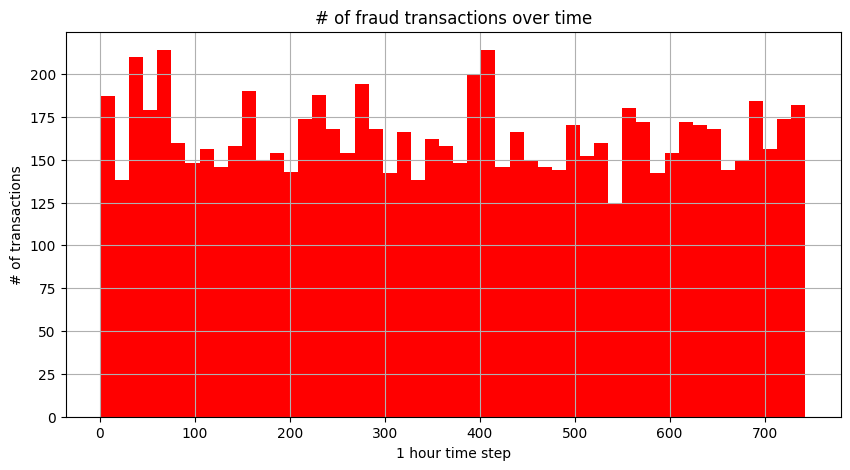

<Figure size 2000x1000 with 0 Axes>

In [38]:
bins = 50

test_data1[(test_data1['isFraud'] == 0)].hist(column="step",color="green",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of valid transactions over time")

test_data1[(test_data1['isFraud'] == 1)].hist(column ="step",color="red",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of fraud transactions over time")

plt.figure(figsize=(20,10))
plt.show()

La variable step es el momento de la simulación (30 días), en la que se realiza la transacción y se observa que después de step 400 las transacciones reales disminuyen considerablemente, mientras que las fraudulentas se mantienen constantes.

Esto puede hacernos pensar que a partir de step 400 hay más proporción de operaciones fraudulentas que antes.